<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DPM2310/blob/main/Nov3-4/LogisticRegresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regresion**

In [ ]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cargamos los datos que vamos a trabajar.

In [ ]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files = glob.glob('/content/drive/MyDrive/Machine Learning/Data/CATS_DOGS/*')

In [ ]:
len(files)

1787

In [ ]:
# Numero de pixeles para nuestras imágenes.
num_px=64

Veamos algunas de las imagenes.

Preparamos el dataset de entrenamiento.

In [ ]:
train_x = []
train_y = []
for file in files[:835]:
    img = Image.open(file)
    img = img.resize((num_px,num_px))
    data = np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
train_y = np.asarray(train_y)
train_x = np.asarray(train_x)

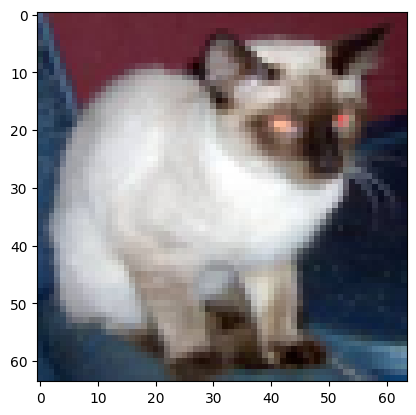

In [ ]:
plt.imshow(train_x[0])

Preparamos el dataset de prueba.

In [ ]:
test_x = []
test_y = []
for file in files[835:]:
    #print(file)
    img = Image.open(file)
    img = img.resize((num_px,num_px))
    data = np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
test_y = np.asarray(test_y)
test_x = np.asarray(test_x)

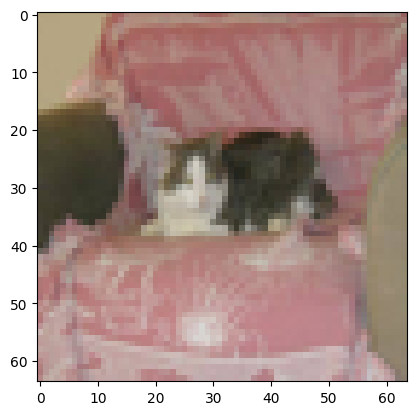

In [ ]:
plt.imshow(test_x[1])

Hacemos una transformación de los arreglos que contienen las imagenes para que sean arreglos de una dimensión.

In [ ]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T

test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

Normalizamos las imágenes.

In [ ]:
train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

Ya esta listo nuestro set de datos para poder trabajar con el.

In [ ]:
# Implementamos el algoritmo de la regresión logística:

# Definimos la función de activación, para este caso sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_regression(X, y, learning_rate=0.01, num_iters=1000):
    n_samples, n_features = X.shape

    # Inicializamos los pesos y la salida del modelo
    weights = np.zeros(n_features)
    bias = 0

    # Implementamos el algoritmo de Gradient Descent
    for i in range(num_iters):
        linear_model = np.dot(X, weights) + bias
        y_predicted = sigmoid(linear_model)

        dw = (1 / n_samples) * np.dot(X.T, (y - y_predicted))
        db = (1 / n_samples) * np.sum(y - y_predicted)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    def predict_prob(X):
        linear_model = np.dot(X, weights) + bias
        return sigmoid(linear_model)

    def predict(X, threshold=0.5):
        y_predicted = predict_prob(X)
        return [1 if i > threshold else 0 for i in y_predicted]

    return predict, predict_prob

# Ejemplo de uso
predict, predict_prob = logistic_regression(train_x, train_y)

ValueError: ignored